# E1: mesh generation

The Jupyter Notebooks in the repository provide an introduction to meshing for FEM and visualizing (using Gmsh and FEniCS). To execute any of the notebooks either locally or in Google Colaboratory, please see the next section for setup instructions.

<p><a href="https://colab.research.google.com/github/rirastorza/heelSimulationDB/blob/main/examples/meshgeneration.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>



## E1.1 Executing using Jupyter Notebook or Installing FEniCS in Colab

### E1.1.1 Installing FEniCS in Colab

This step is only necesary if we are going to run this simulation in Colab. We have to install the FEniCS packages. The instructions below will install a collection of packages that allows to easily install several finite element libraries on Google Colab. This solution is provided by https://fem-on-colab.github.io/

In [ ]:
%%capture
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

### E1.1.2 Installing Gmsh

This step will install the software for meshing Gmsh https://gmsh.info/

In [ ]:
%%capture
!apt install gmsh

### E.1.1.3 Running a Jupyter Notebook

Once you clone this repository and are in the correct folder you can run this notebook by the following sentence in the command line interface:

*jupyter notebook coding.ipynb*

## E1.2 Mesh generation 

This step is the first part of the script *plot_permittivity_map.py* in the folder meshes. This can be done in the command line but here is prefered the scripting form using the tool *os* in python.

First all the necessary libraries are imported and then with the instruction *gmsh -2 -clmax 20e-3* we generate a .msh mesh with the .geo (CAD file).

In [1]:
from __future__ import print_function

import os
import numpy as np
from scipy.constants import epsilon_0, pi

filename = 'patient1_slice1'
string = "gmsh -2 -clmax 20.e-3 "+filename+".geo"
os.system(string)

0

The program *dolfin-convert* convert the generated mesh (.msh format of Gmsh) into .xml format for FEniCS.

In [ ]:
string = "dolfin-convert "+filename+".msh "+filename+".xml"
os.system(string)

Note that the file *patient1_slice1.geo* should be loaded in Colab.

## E1.3 Import in FEniCS and preparing domains

This is step is for using in a finite element solver (in preparation). For now we are only using it for plotting the domains and mesh.

In [2]:
#This line should be commented if running in Colab.
from fenics import *

mesh = Mesh(filename+".xml");
subdomains = MeshFunction('size_t',mesh,filename+"_physical_region.xml");
boundaries = MeshFunction('size_t',mesh,filename+"_facet_region.xml");

Plotting with matplotlib.

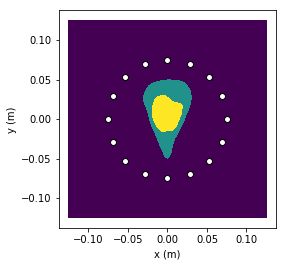

In [4]:
import matplotlib.pyplot as plt

plt.figure(1)

plot(subdomains)

#plot(mesh) 

#Position of the antennas
xposant = np.array([])
yposant = np.array([])
for n in range(0,16):
    xrint = (15.0e-2/2)*np.cos(n*2*pi/16)
    yrint = (15.0e-2/2)*np.sin(n*2*pi/16)
    xposant = np.append(xposant,xrint)
    yposant = np.append(yposant,yrint)

plt.plot(xposant,yposant,'ko',markeredgecolor ='k', markerfacecolor='w')

plt.ylabel(r'y (m)')
plt.xlabel(r'x (m)')

plt.show()

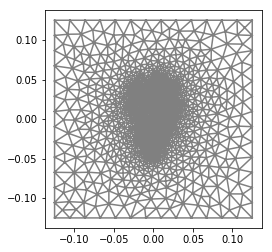

In [5]:
plot(mesh)
plt.show()